In [1]:
se_f = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_A2_black/annotation_clones/input_donor_cluster_distribution"
input_cond = "Input"

## Plot by donor and condition

In [2]:
library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)

Attaching SeuratObject


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
se <- readRDS(se_f)
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<int>,<chr>,<I<chr>>,<fct>,<fct>,<fct>,<fct>
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,⋯,6,6,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,⋯,7,7,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,⋯,7,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,⋯,4,4,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,⋯,6,6,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17
Control_AAACGAAAGTGTCGGA-1,Control,756,756,3362,524,15,12,154,836,1821,⋯,4,4,1133,1068,AAACGAAAGTGTCGGA-1_Control,Control_AAACGAAAGTGTCGGA-1,3,1,Control,1_3
Control_AAACGAACACTCGCAG-1,Control,1444,1444,6285,831,22,23,319,1872,3218,⋯,1,1,1855,1658,AAACGAACACTCGCAG-1_Control,Control_AAACGAACACTCGCAG-1,21,0,Control,0_21
Control_AAACGAAGTCTTAGCA-1,Control,1921,1921,10456,1353,31,23,417,3769,4863,⋯,4,4,2918,2480,AAACGAAGTCTTAGCA-1_Control,Control_AAACGAAGTCTTAGCA-1,20,1,Control,1_20
Control_AAACGAAGTGAGGGTT-1,Control,425,425,1347,226,5,9,48,307,752,⋯,9,9,439,426,NA,Control_AAACGAAGTGAGGGTT-1,None,None,None,None


## Plot lineage

In [4]:
donors <- levels(se$donor)
donors <-  donors[donors != "None"]
donors

[1] "0" "1"

In [5]:
names <- (unique(se$name))
names <- names[! names=="None"]

## Subset for input

In [6]:
expr <- FetchData(se, vars = "orig.ident")
input.se <- se[, which(expr == input_cond)]
input.se

#expr <- FetchData(input.se, vars = "donor")
#input.se <- input.se[, which(expr != "None")]
#input.se

An object of class Seurat 
221404 features across 6381 samples within 2 assays 
Active assay: RNA (19039 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [7]:
barplot.df <- se[[]] %>% group_by(seurat_clusters,donor) %>% summarize(size=n())# %>% mutate(donor=donor)
barplot.df

`summarise()` has grouped output by 'seurat_clusters'. You can override using the `.groups` argument.



seurat_clusters,donor,size
<fct>,<fct>,<int>
0,0,1183
0,1,820
0,None,297
1,0,1085
1,1,1044
1,None,156
2,0,968
2,1,1025
2,None,95


In [8]:
barplot.df

seurat_clusters,donor,size
<fct>,<fct>,<int>
0,0,1183
0,1,820
0,None,297
1,0,1085
1,1,1044
1,None,156
2,0,968
2,1,1025
2,None,95


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



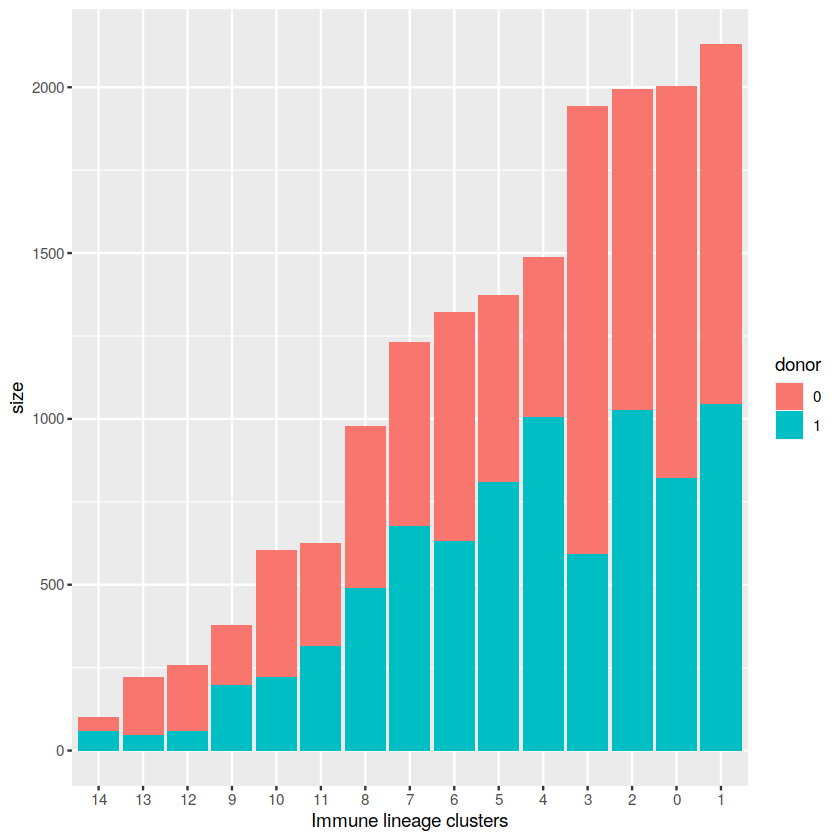

In [9]:
g <- ggplot(barplot.df[!(barplot.df$donor == "None" | is.na(barplot.df$donor)), ],
            aes(x=reorder(seurat_clusters, size), y=size, fill=donor)) + 
            geom_bar(stat='identity') + 
            xlab("Immune lineage clusters")
ggsave(file.path(outdir, "input_lineage_clusters_donor_distribution.png"))
ggsave(file.path(outdir, "input_lineage_clusters_donor_distribution.pdf"))
g 
